In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
def generate_house_price_data():
    """Generate house price data for prediction."""
    np.random.seed(42)
    square_footage = np.random.randint(500, 5000, 100)  # Square footage (500 to 5000)
    num_bedrooms = np.random.randint(1, 6, 100)  # Number of bedrooms (1 to 5)
    num_bathrooms = np.random.randint(1, 4, 100)  # Number of bathrooms (1 to 3)
    location_factor = np.random.choice([1, 1.5, 2], 100)  # Location factor (1 = rural, 2 = city center, etc.)

    price = (square_footage * 100) + (num_bedrooms * 5000) + (num_bathrooms * 3000) + (location_factor * 10000) + np.random.randint(10000, 50000, 100)

    data = pd.DataFrame({
        'Square Footage': square_footage,
        'Bedrooms': num_bedrooms,
        'Bathrooms': num_bathrooms,
        'Location Factor': location_factor,
        'Price': price
    })
    return data

In [3]:
# trainingg a linear Regression Model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    #Mean Squared Error (MSE)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    return y_pred

In [4]:
def plot_results(y_test, y_pred):
    
    #plot actual vs predicted prices.
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted House Prices')
    plt.show()

In [ ]:
def main():
    # generate data for house prices
    data = generate_house_price_data()

    X = data[['Square Footage', 'Bedrooms', 'Bathrooms', 'Location Factor']]  # Features
    y = data['Price']  # Target (Price)

    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # train model
    model = train_model(X_train, y_train)

    y_pred = evaluate_model(model, X_test, y_test)

    # plotting
    plot_results(y_test, y_pred)

    new_house = np.array([[2400, 4, 2, 2]])  # eg house with 2400 sqft 4 bedrooms 2 bathrooms and location factor 2
    new_house_scaled = scaler.transform(new_house)
    predicted_price = model.predict(new_house_scaled)
    print(f"Predicted price for the new house: ${predicted_price[0]:,.2f}")

Mean Squared Error: 135253958.57241926


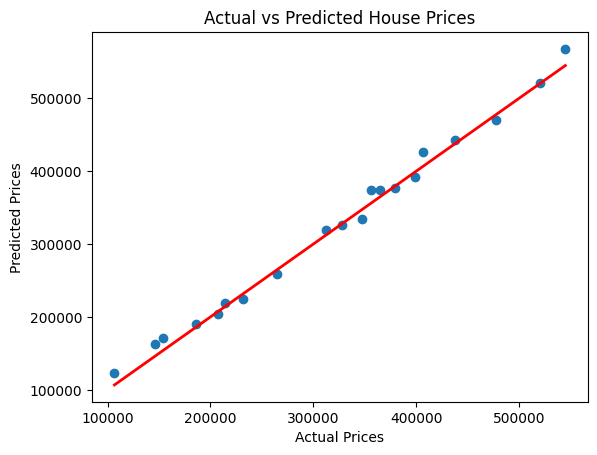

Predicted price for the new house: $333,670.71


/home/amirshapkota/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:
main()